In [157]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [158]:
def load_img(file_name: str, grayscale: bool) -> np.ndarray:
    img = Image.open(file_name)
    img.thumbnail((500, 500))
    
    if grayscale:
        img = img.convert('L')
    
    return np.array(img)

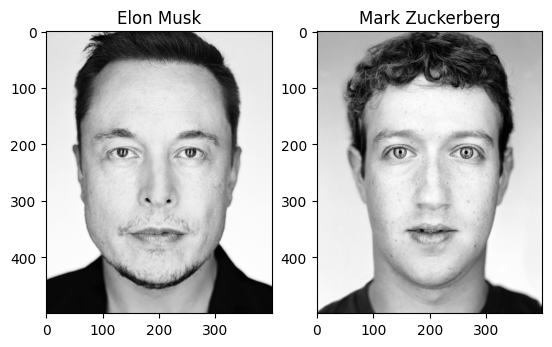

In [159]:
musk = load_img('elon_musk.jpg', grayscale=True)
zuckerberg = load_img('mark_zuckerberg.jpg', grayscale=True)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(musk, cmap='gray')
ax[0].set_title('Elon Musk')
ax[1].imshow(zuckerberg, cmap='gray')
ax[1].set_title('Mark Zuckerberg')

plt.show()

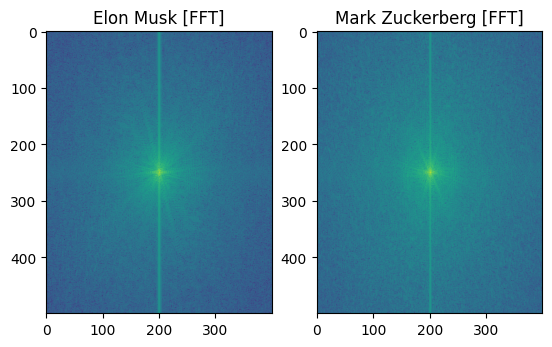

In [160]:
musk_fft = np.fft.fftshift(np.fft.fft2(musk))
zuckerberg_fft = np.fft.fftshift(np.fft.fft2(zuckerberg))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(np.log1p(np.abs(musk_fft)))
ax[0].set_title('Elon Musk [FFT]')
ax[1].imshow(np.log1p(np.abs(zuckerberg_fft)))
ax[1].set_title('Mark Zuckerberg [FFT]')

plt.show()

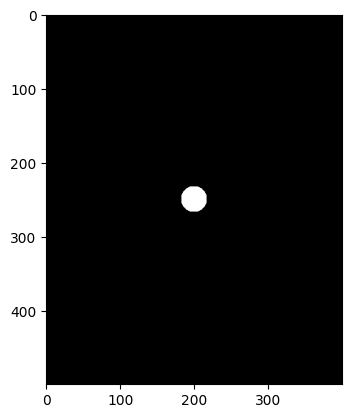

In [252]:
mask = np.zeros(musk_fft.shape)

x_center = (mask.shape[1] - 1) / 2
y_center = (mask.shape[0] - 1) / 2

radius = 17.5
for y_idx in range(mask.shape[0]):
    for x_idx in range(mask.shape[1]):
        distance_to_center = np.sqrt((x_idx - x_center) ** 2 + (y_idx - y_center) ** 2)
        if distance_to_center < radius:
            mask[y_idx, x_idx] = 1

mask = mask.astype(bool)

plt.imshow(mask, cmap='gray')
plt.show()

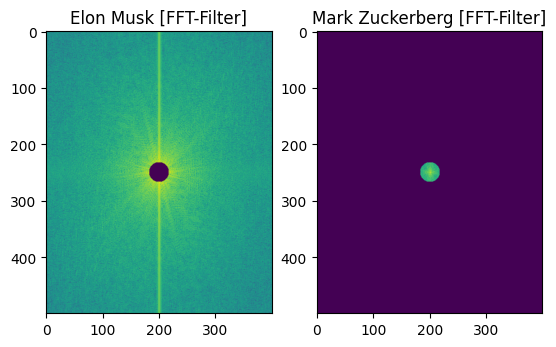

In [253]:
musk_fft_filter = musk_fft.copy()
musk_fft_filter[mask == 1] = 0

zuckerberg_fft_filter = zuckerberg_fft.copy()
zuckerberg_fft_filter[mask == 0] = 0

fig, ax = plt.subplots(1, 2)
ax[0].imshow(np.log1p(np.abs(musk_fft_filter)))
ax[0].set_title('Elon Musk [FFT-Filter]')
ax[1].imshow(np.log1p(np.abs(zuckerberg_fft_filter)))
ax[1].set_title('Mark Zuckerberg [FFT-Filter]')

plt.show()

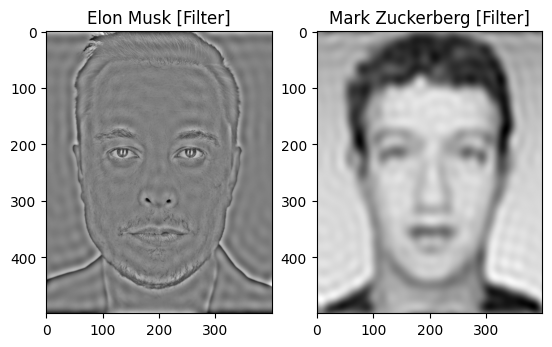

In [254]:
musk_ifft_filter = np.real(np.fft.ifft2(np.fft.ifftshift(musk_fft_filter)))
zuckerberg_ifft_filter = np.real(np.fft.ifft2(np.fft.ifftshift(zuckerberg_fft_filter)))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(musk_ifft_filter, cmap='gray')
ax[0].set_title('Elon Musk [Filter]')
ax[1].imshow(zuckerberg_ifft_filter, cmap='gray')
ax[1].set_title('Mark Zuckerberg [Filter]')

plt.show()

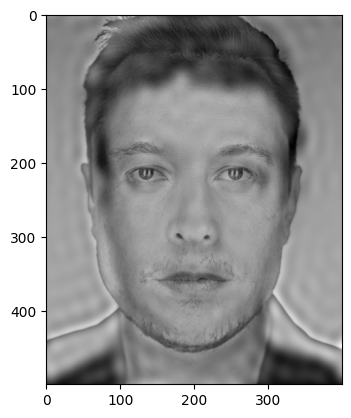

In [255]:
musk_zuckerberg_mix = np.real(np.fft.ifft2(np.fft.ifftshift(musk_fft_filter + zuckerberg_fft_filter)))

plt.imshow(musk_zuckerberg_mix, cmap='gray')
plt.show()